## FLight Price Prediction

In [1]:
## Importing the necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV



#### Importing dataset
* Since data is in form of excel file we have to use pandas read_excel to load the data  
* After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row  
* Check whether any null values are there or not. if it is present then following can be done,  
       ->Imputing data using Imputation method in sklearn  
       ->Filling NaN values with mean, median and mode using fillna() method  
* Describe data --> which can give statistical analysis  

In [3]:
# Reading the dataset
train_df=pd.read_excel('data/Data_Train.xlsx')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_df.shape

(10683, 11)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since the dataset has significant number of records and the missing values are insignificant .ie only 2 records contain missing values ,it is better to drop the record with missing values ,so that it doesn't impact much on the model and the model performance.

In [9]:
#Dropping the records with missing values

train_df.dropna(inplace=True)

In [10]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Preprocessing the train dataset
Date_of_Journey is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

----> .dt.day method will extract only day of that date  
----> .dt.month method will extract only month of that date

In [11]:
train_df['Journey_Day']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_df['Journey_Month']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [12]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_Day      10682 non-null  int32 
 12  Journey_Month    10682 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1.1+ MB


In [14]:
# Dropping the column, Date_o_ journey since it is not neceassary as its already converted into day and month
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
#converting Dep time column into hr and mins

train_df['Dep_hr']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

#Dropping the Dep_Time column as it not further needed

train_df.drop('Dep_Time',axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\1331379325.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_hr']=pd.to_datetime(train_df['Dep_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_5136\1331379325.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_Min']=pd.to_datetime(train_df['Dep_Time']).dt.minute


In [17]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
#converting Arrival time column into hr and mins same as Dep_Time

train_df['Arrival_hr']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_Min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute

#Dropping the Dep_Time column as it not further needed

train_df.drop('Arrival_Time',axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\1662273172.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_hr']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_5136\1662273172.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_Min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute


In [19]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
duration=list(train_df['Duration'])

for i in range(len(duration)):
    split_duration=duration[i].split(' ')
    if len(split_duration)!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+" 0m"
            
            
        else:
            duration[i]="0h "+duration[i]
            
            
duration
train_df['Duration']=duration            


In [21]:
train_df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h 0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h 0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h 0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h 0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h 0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '18h 45m',
       '12h 20m', '18h 0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h 0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h 0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m',

In [22]:
train_df[train_df['Duration']=='0h 5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,0h 5m,2 stops,No info,17327,6,3,16,50,16,55


In [23]:
#Since the Duration of flight is '0h 5m' ,it cannot happen since there are 2 stops.

#we have to drop the records with duration '0 h 5m' as the entries are not valid or wrongly entered the duration 

train_df.drop(6474,axis=0,inplace=True)


In [24]:
#Handling 'Duration' Feature

#Departure time should be split into hr and min
#df['Duration'].str.split(' ')
#df['Duration_hr']=df['Duration'].str.split(' ').str[0].str[0] # series splitting


train_df['Duration_hour']=train_df['Duration'].str.split(' ').str[0].str.split('h').str[0] # series splitting 

train_df['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [25]:
train_df['Duration_min']=train_df['Duration'].str.split(' ').str[1].str.split('m').str[0] # series splitting 

train_df['Duration_min'].unique()

array(['50', '25', '0', '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [26]:
#Dropping the 'Duration' column since its not required after splitting to hr and min

train_df.drop('Duration',axis=1,inplace=True)

In [27]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   Journey_Day      10681 non-null  int32 
 8   Journey_Month    10681 non-null  int32 
 9   Dep_hr           10681 non-null  int32 
 10  Dep_Min          10681 non-null  int32 
 11  Arrival_hr       10681 non-null  int32 
 12  Arrival_Min      10681 non-null  int32 
 13  Duration_hour    10681 non-null  object
 14  Duration_min     10681 non-null  object
dtypes: int32(6), int64(1), object(8)
memory usage: 1.1+ MB


In [29]:
train_df['Duration_hour']=train_df['Duration_hour'].astype('int64')
train_df['Duration_min']=train_df['Duration_min'].astype('int64')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   Journey_Day      10681 non-null  int32 
 8   Journey_Month    10681 non-null  int32 
 9   Dep_hr           10681 non-null  int32 
 10  Dep_Min          10681 non-null  int32 
 11  Arrival_hr       10681 non-null  int32 
 12  Arrival_Min      10681 non-null  int32 
 13  Duration_hour    10681 non-null  int64 
 14  Duration_min     10681 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


### Handling Categorical Data
One can find many ways to handle categorical data. Some of the categorical data are,  

<font color='Green'>**Nominal data**</font>--> data are not in any order --><font color='blue'>**OneHotEncoder**</font> is used in this case  
<font color='Green'>**Ordinal data**</font> --> data are in order --><font color='blue'>**LabelEncoder**</font> is used in this case

In [30]:
train_df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

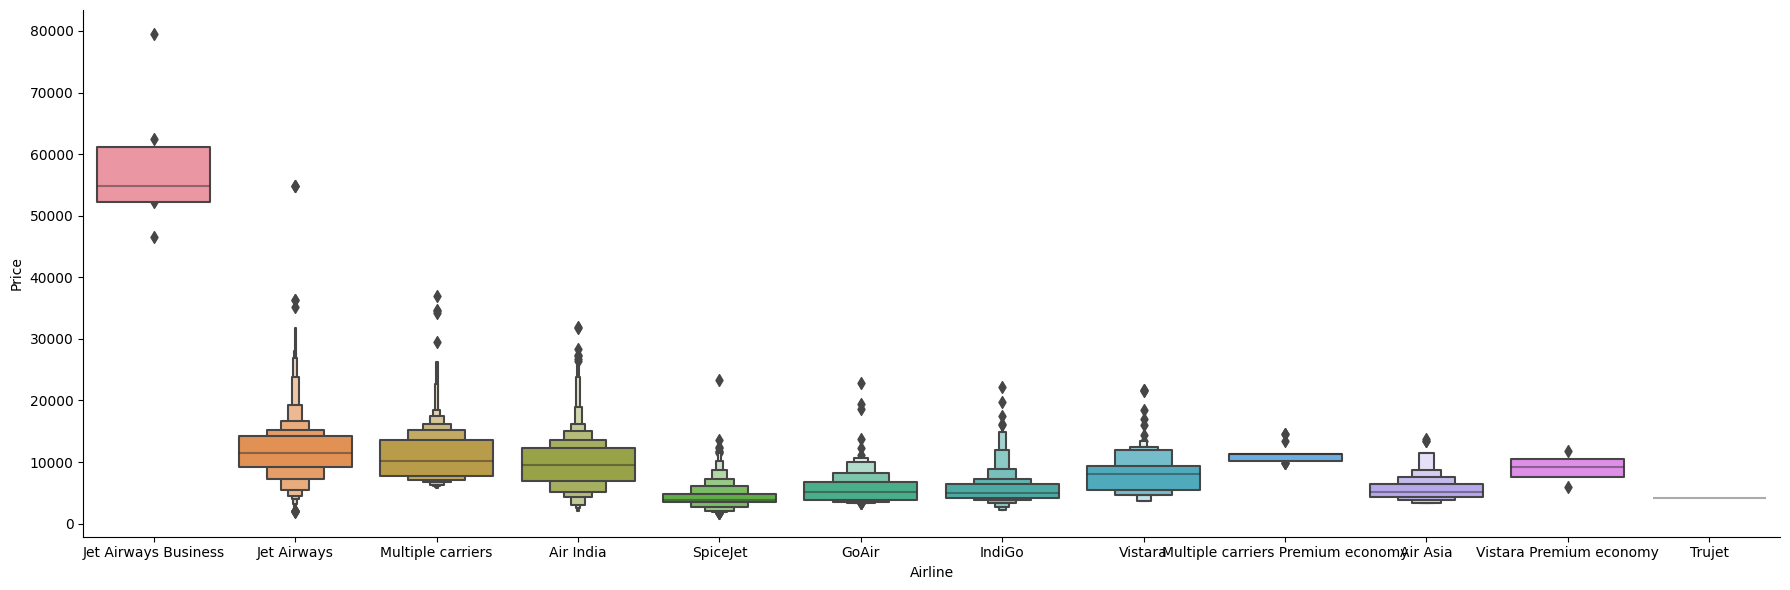

In [31]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(x = "Airline",y = "Price",  data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
#Since 'Airline' is a nominal data we will apply one hot encoding

Airline=pd.get_dummies(train_df[['Airline']],drop_first=True)
Airline.head()




,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [33]:
#Handling Source column

train_df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: count, dtype: int64

d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

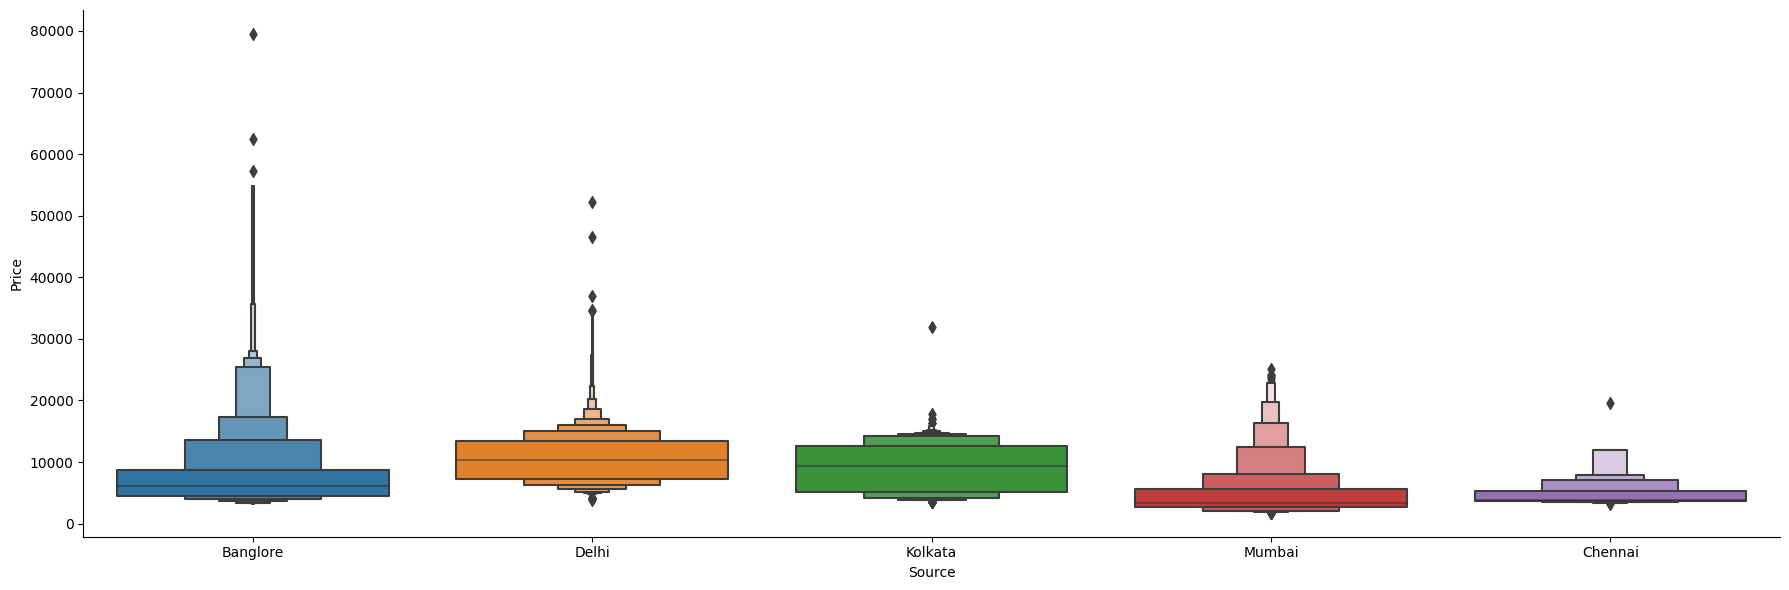

In [34]:
sns.catplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen', height = 6, aspect = 3)

In [35]:
source=pd.get_dummies(train_df[['Source']],drop_first=True)
source.head()                              

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [36]:
# Handling 'Destination' column

train_df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

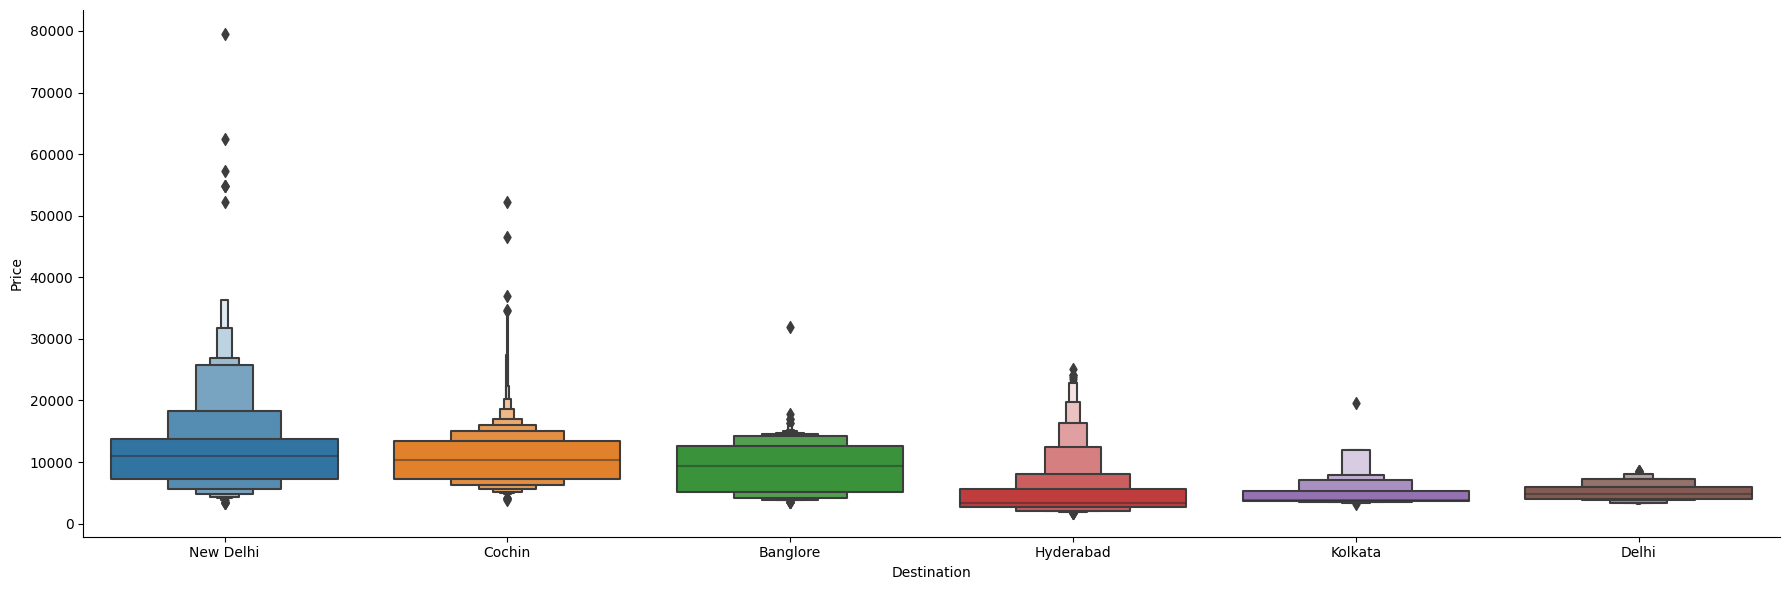

In [37]:
sns.catplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen', height= 6, aspect= 3)


In [38]:
destination=pd.get_dummies(train_df[['Destination']],drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [39]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [40]:
#Handling 'Route' and 'Additional info' columns

In [41]:
train_df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10681, dtype: object

In [42]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [43]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [44]:
# Handling 'Total_Stops' column

train_df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: count, dtype: int64

In [45]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1, '2 stops':2,'3 stops':3,'4 stops':4})

In [46]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [47]:
# Concatinating all the one hot encoded columns

train_df=pd.concat([train_df,Airline,source,destination],axis=1)
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [48]:
#Dropping the categorical columns as its not further needed

train_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
train_df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [49]:
train_df.shape

(10681, 30)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10681 non-null  int64
 1   Price                                      10681 non-null  int64
 2   Journey_Day                                10681 non-null  int32
 3   Journey_Month                              10681 non-null  int32
 4   Dep_hr                                     10681 non-null  int32
 5   Dep_Min                                    10681 non-null  int32
 6   Arrival_hr                                 10681 non-null  int32
 7   Arrival_Min                                10681 non-null  int32
 8   Duration_hour                              10681 non-null  int64
 9   Duration_min                               10681 non-null  int64
 10  Airline_Air India                          10681 no

## Test Data

In [53]:
# Reading the dataset
test_df=pd.read_excel('data/Test_set.xlsx')

In [54]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Preprocessing on the Test Dataset

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [56]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [57]:


# Date_of_Journey
test_df['Journey_day'] = pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_df['Journey_month'] = pd.to_datetime(test_df['Date_of_Journey'], format = "%d/%m/%Y").dt.month
test_df.drop(['Date_of_Journey'], axis = 1, inplace = True)
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [58]:

# Dep_Time
test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute
test_df.drop(['Dep_Time'], axis = 1, inplace = True)
test_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\2277604510.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_5136\2277604510.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Dep_min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [59]:

# Arrival_Time

test_df['Arrival_hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_min'] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(['Arrival_Time'], axis = 1, inplace = True)
test_df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\4016647410.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Arrival_hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_5136\4016647410.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Arrival_min'] = pd.to_datetime(test_df.Arrival_Time).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [60]:
#Duration 

duration=list(test_df['Duration'])

for i in range(len(duration)):
    split_duration=duration[i].split(' ')
    if len(split_duration)!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+" 0m"
            
            
        else:
            duration[i]="0h "+duration[i]
            
            
duration
test_df['Duration']=duration            


In [61]:
test_df['Duration'].unique()

array(['10h 55m', '4h 0m', '23h 45m', '13h 0m', '2h 50m', '18h 20m',
       '15h 5m', '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m',
       '10h 15m', '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m',
       '9h 10m', '14h 50m', '14h 5m', '11h 35m', '13h 30m', '12h 25m',
       '2h 30m', '25h 30m', '19h 25m', '7h 0m', '11h 40m', '7h 5m',
       '3h 0m', '1h 25m', '2h 40m', '17h 5m', '10h 40m', '12h 30m',
       '1h 30m', '23h 40m', '2h 20m', '23h 35m', '27h 40m', '28h 20m',
       '5h 45m', '26h 25m', '5h 40m', '2h 15m', '2h 55m', '7h 30m',
       '5h 20m', '25h 50m', '13h 15m', '26h 20m', '5h 25m', '8h 45m',
       '7h 20m', '21h 10m', '16h 0m', '7h 50m', '16h 5m', '5h 55m',
       '13h 50m', '11h 55m', '13h 20m', '18h 10m', '28h 10m', '5h 0m',
       '23h 15m', '1h 15m', '1h 20m', '13h 25m', '6h 15m', '10h 10m',
       '4h 35m', '11h 0m', '12h 20m', '15h 10m', '19h 0m', '13h 45m',
       '9h 50m', '2h 35m', '7h 15m', '23h 0m', '10h 25m', '5h 5m',
       '22h 45m', '8h 40m', '11

In [62]:
test_df[test_df['Duration']=='0h 5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,0h 5m,2 stops,No info,12,3,16,50,16,55


In [63]:
#Since the Duration of flight is '0h 5m' ,it cannot happen since there are 2 stops.

#we have to drop the records with duration '0 h 5m' as the entries are not valid or wrongly entered the duration 

test_df.drop(2660,axis=0,inplace=True)


In [64]:
#Handling 'Duration' Feature

#Departure time should be split into hr and min


test_df['Duration_hour']=test_df['Duration'].str.split(' ').str[0].str.split('h').str[0] # series splitting 



test_df['Duration_min']=test_df['Duration'].str.split(' ').str[1].str.split('m').str[0] # series splitting 

#Dropping the 'Duration' column since its not required after splitting to hr and min

test_df.drop('Duration',axis=1,inplace=True)

In [65]:
test_df['Duration_hour']=test_df['Duration_hour'].astype('int64')
test_df['Duration_min']=test_df['Duration_min'].astype('int64')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2670 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2670 non-null   object
 1   Source           2670 non-null   object
 2   Destination      2670 non-null   object
 3   Route            2670 non-null   object
 4   Total_Stops      2670 non-null   object
 5   Additional_Info  2670 non-null   object
 6   Journey_day      2670 non-null   int32 
 7   Journey_month    2670 non-null   int32 
 8   Dep_hour         2670 non-null   int32 
 9   Dep_min          2670 non-null   int32 
 10  Arrival_hour     2670 non-null   int32 
 11  Arrival_min      2670 non-null   int32 
 12  Duration_hour    2670 non-null   int64 
 13  Duration_min     2670 non-null   int64 
dtypes: int32(6), int64(2), object(6)
memory usage: 250.3+ KB


#### Handling Categorical data

In [66]:

test_df["Airline"].value_counts()


Airline
Jet Airways                          897
IndiGo                               511
Air India                            439
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

In [67]:
Airline = pd.get_dummies(test_df['Airline'], drop_first= True)


In [68]:
test_df['Source'].value_counts()

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       185
Chennai       75
Name: count, dtype: int64

In [69]:
source=pd.get_dummies(test_df['Source'],drop_first=True)

In [70]:
test_df['Destination'].value_counts()

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     185
Kolkata        75
Name: count, dtype: int64

In [71]:
destination=pd.get_dummies(test_df[['Destination']],drop_first=True)

In [72]:
#Handling 'Route' and 'Additional info' columns

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [73]:
#Handling 'Total_Stops' column
test_df['Total_Stops'].value_counts()


Total_Stops
1 stop      1431
non-stop     849
2 stops      378
3 stops       11
4 stops        1
Name: count, dtype: int64

In [74]:


# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

test_df['Total_Stops']=test_df['Total_Stops'].map({'non-stop':0,'1 stop':1, '2 stops':2,'3 stops':3,'4 stops':4})

In [75]:
# Concatinating all the one hot encoded columns

test_df=pd.concat([test_df,Airline,source,destination],axis=1)
test_df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [76]:
#Dropping the categorical columns as its not further needed

test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_df.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [77]:
test_df.shape

(2670, 28)

## Feature Selection¶

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

* heatmap
* feature_importance_
* SelectKBest

In [78]:
# selecting X and y 

X=train_df.drop(['Price'],axis=1)
y=train_df['Price']

In [79]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hr,Dep_Min,Arrival_hr,Arrival_Min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [80]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

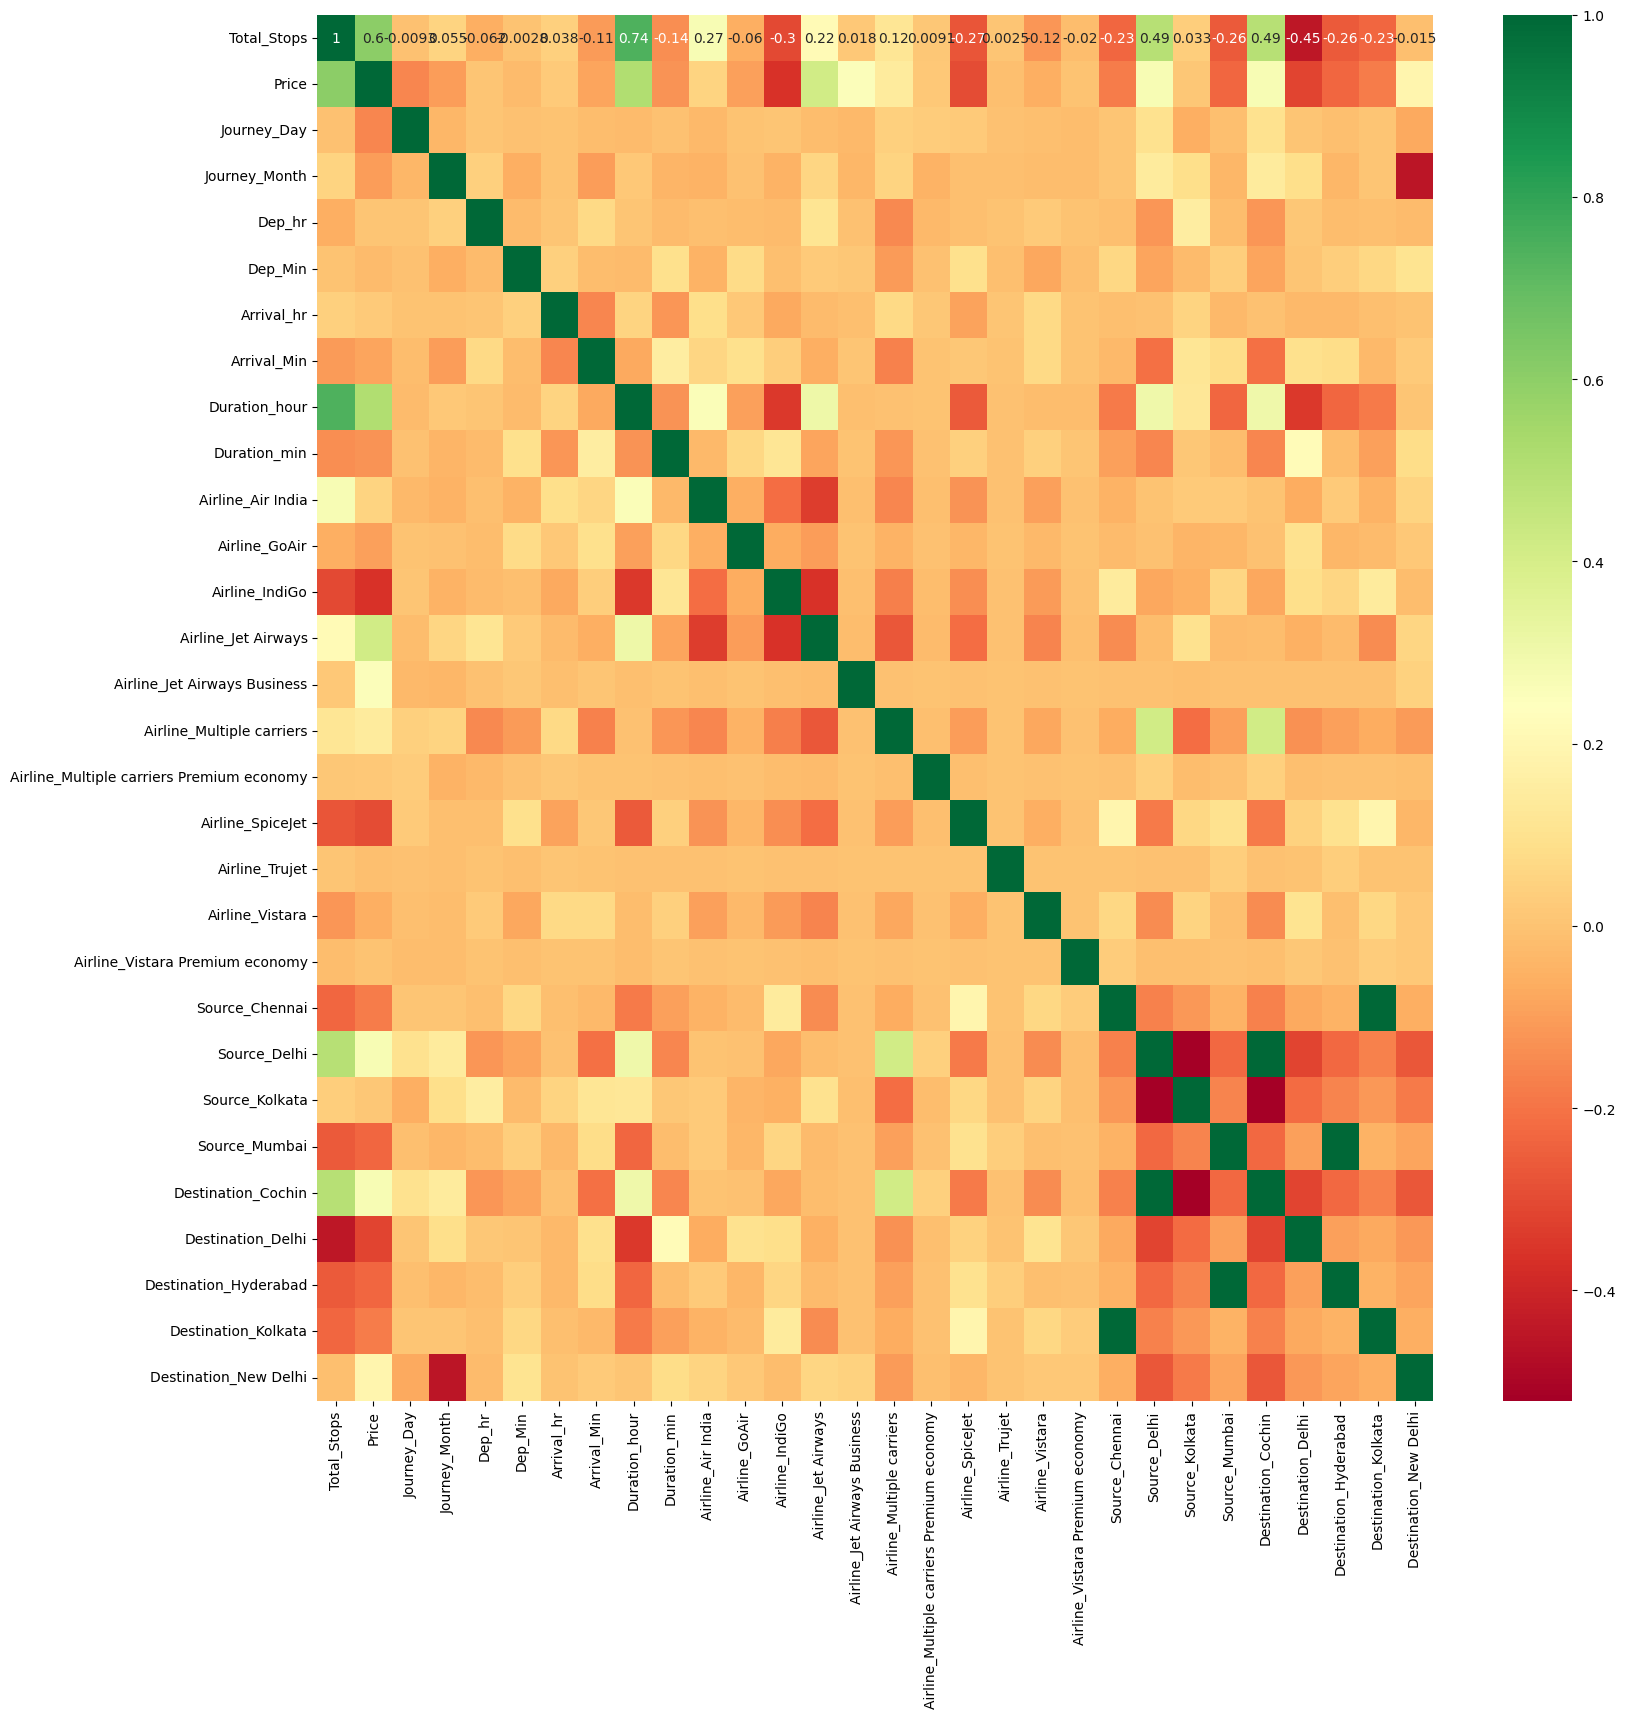

In [81]:
#Find correlation between independent and dependent variables


plt.figure(figsize=(18,18))

sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [82]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [83]:
imp_features=selection.feature_importances_
imp_features


array([2.32855568e-01, 1.45319853e-01, 5.27047712e-02, 2.42664286e-02,
       2.16894101e-02, 2.74233410e-02, 1.90650232e-02, 1.17382880e-01,
       1.75157130e-02, 8.66694489e-03, 2.07177860e-03, 1.97289410e-02,
       1.38049391e-01, 6.73878835e-02, 1.91923258e-02, 8.13128090e-04,
       3.70205035e-03, 1.21791386e-04, 4.84507092e-03, 7.30772588e-05,
       5.08268208e-04, 8.90859511e-03, 3.33735835e-03, 7.66580220e-03,
       1.04934651e-02, 1.45310645e-02, 6.53670558e-03, 4.81112407e-04,
       2.46622567e-02])

In [84]:
index=np.argsort(-imp_features) #Sort descending to get the column with high importance as first
index

array([ 0,  1, 12,  7, 13,  2,  5, 28,  3,  4, 11, 14,  6,  8, 25, 24, 21,
        9, 23, 26, 18, 16, 22, 10, 15, 20, 27, 17, 19], dtype=int64)

In [85]:
#Arranging the columns according to the importance
sorted_columns=X.columns[index]
sorted_columns

Index(['Total_Stops', 'Journey_Day', 'Airline_Jet Airways', 'Duration_hour',
       'Airline_Jet Airways Business', 'Journey_Month', 'Arrival_hr',
       'Destination_New Delhi', 'Dep_hr', 'Dep_Min', 'Airline_IndiGo',
       'Airline_Multiple carriers', 'Arrival_Min', 'Duration_min',
       'Destination_Delhi', 'Destination_Cochin', 'Source_Delhi',
       'Airline_Air India', 'Source_Mumbai', 'Destination_Hyderabad',
       'Airline_Vistara', 'Airline_SpiceJet', 'Source_Kolkata',
       'Airline_GoAir', 'Airline_Multiple carriers Premium economy',
       'Source_Chennai', 'Destination_Kolkata', 'Airline_Trujet',
       'Airline_Vistara Premium economy'],
      dtype='object')

In [86]:
#Most 20 important columns

sorted_columns[0:20]

Index(['Total_Stops', 'Journey_Day', 'Airline_Jet Airways', 'Duration_hour',
       'Airline_Jet Airways Business', 'Journey_Month', 'Arrival_hr',
       'Destination_New Delhi', 'Dep_hr', 'Dep_Min', 'Airline_IndiGo',
       'Airline_Multiple carriers', 'Arrival_Min', 'Duration_min',
       'Destination_Delhi', 'Destination_Cochin', 'Source_Delhi',
       'Airline_Air India', 'Source_Mumbai', 'Destination_Hyderabad'],
      dtype='object')

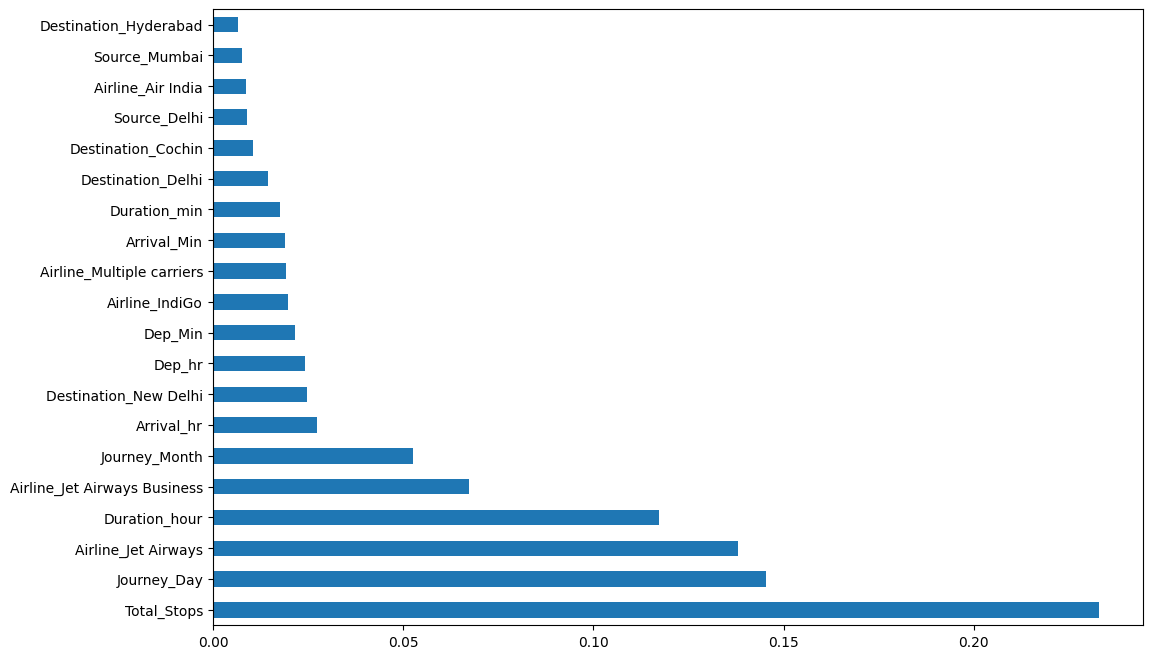

In [87]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Create an Evaluate Function to give all metrics after model Training

In [89]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [90]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list =[]
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2842.8954
- Mean Absolute Error: 1955.4261
- R2 Score: 0.6205
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2778.9741
- Mean Absolute Error: 1932.6079
- R2 Score: 0.6342


Lasso
Model performance for Training set
- Root Mean Squared Error: 2843.8805
- Mean Absolute Error: 1955.6458
- R2 Score: 0.6202
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2782.0469
- Mean Absolute Error: 1935.1928
- R2 Score: 0.6334


Ridge
Model performance for Training set
- Root Mean Squared Error: 2849.7014
- Mean Absolute Error: 1957.5390
- R2 Score: 0.6187
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2783.9377
- Mean Absolute Error: 1937.6487
- R2 Score: 0.6329




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2354.4106
- Mean Absolute Error: 1439.2357
- R2 Score: 0.7397
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3008.8472
- Mean Absolute Error: 1869.1168
- R2 Score: 0.5712


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 801.0804
- Mean Absolute Error: 325.1276
- R2 Score: 0.9699
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2489.7614
- Mean Absolute Error: 1300.5482
- R2 Score: 0.7064


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 984.6525
- Mean Absolute Error: 571.2287
- R2 Score: 0.9545
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2072.0337
- Mean Absolute Error: 1140.5223
- R2 Score: 0.7966


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 3436.5614
- Mean Abs

In [91]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.796638
4,Decision Tree,0.706376
0,Linear Regression,0.634199
1,Lasso,0.633390
2,Ridge,0.632891
3,K-Neighbors Regressor,0.571179
6,AdaBoost Regressor,0.443266


### Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test  
If needed do scaling of data-Scaling is not done in Random forest  
Import model  
Fit the data  
Predict w.r.t X_test  
In regression check RSME Score  
Plot graph  

In [92]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
y_pred = reg_rf.predict(X_test)

In [94]:
reg_rf.score(X_train, y_train)

0.9545356843376375

In [95]:
reg_rf.score(X_test, y_test)

0.7979997394196755

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\ML Project-Flight_Price_Prediction\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

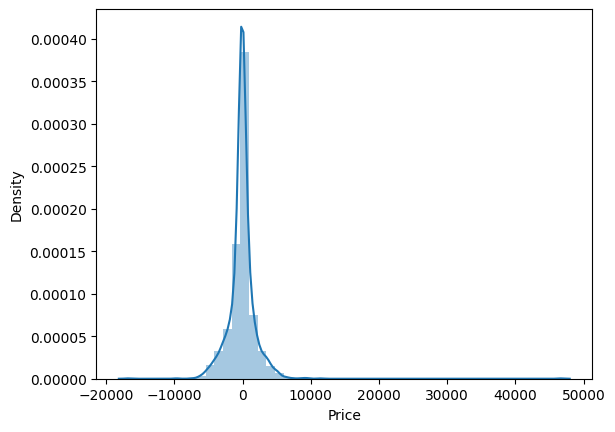

In [96]:
sns.distplot(y_test-y_pred)
plt.show()

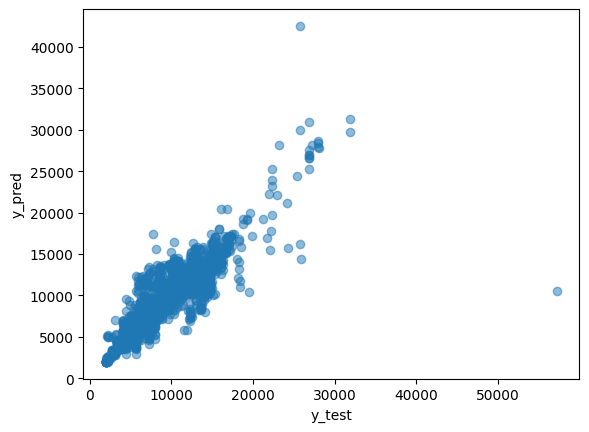

In [97]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [98]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ',metrics.r2_score(y_test, y_pred))

MAE: 1139.115850068392
MSE: 4264581.221371745
RMSE: 2065.086250346882
R2 score:  0.7979997394196755


In [99]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

#### Hyperparameter Tuning
* Choose following method for hyperparameter tuning  
       **RandomizedSearchCV** --> Fast  
      
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
# Selecting best parameters using RandomizedSearchCV for Random Forest Regreesor

# Number of trees in random forest

n_estimators=[int(x) for x in np.linspace(100,1200,12)]

# Number of features to consider at every split

max_features=['auto','sqrt']

# Maximum number of levels in tree

max_depth=[int(x) for x in np.linspace(5,30,6)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 5, 10]

In [102]:
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}

In [103]:
#Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_params=RandomizedSearchCV(reg_rf,param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [104]:
rf_params.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s


KeyboardInterrupt: 

In [ ]:
rf_params.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
y_predict=rf_params.predict(X_test)


C:\Users\HP\AppData\Local\Temp\ipykernel_5356\131618627.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_predict)


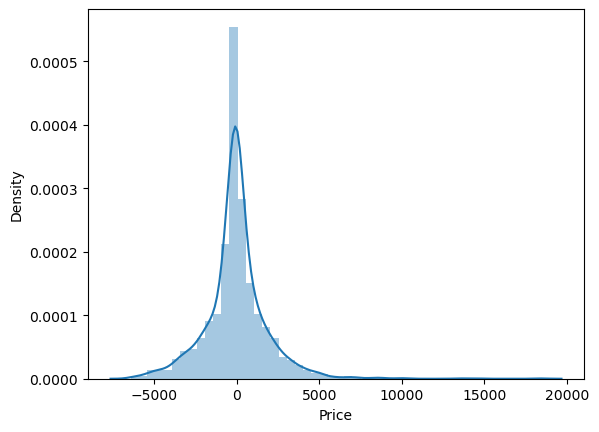

In [ ]:
plt.plot(figsize=(8,8))
sns.distplot(y_test-y_predict)
plt.show()

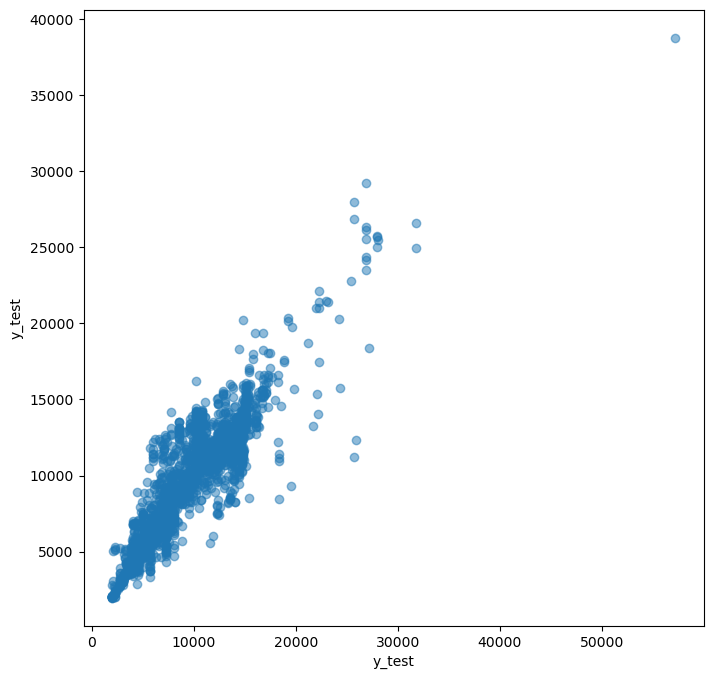

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_test")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1216.9979705058338
MSE: 3615487.900111564
RMSE: 1901.443635796645


## Save the model to reuse it again

In [ ]:
import pickle

In [ ]:
# opening a file to store the data

file=open('flight_rf.pkl','wb')

In [123]:
#dumping information to the file
pickle.dump(rf_params,file)

In [124]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)


In [125]:
y_prediction = forest.predict(X_test)
y_prediction

array([ 6308.2915    ,  8742.51425   , 11406.71944922, ...,
        7735.36396667, 13122.07557231, 14031.3025    ])

In [126]:
metrics.r2_score(y_test, y_prediction)

0.8287453186991645